In [9]:
# 4D画像の可視化ツール
# img4D = [t, z, r, c]
# img3D = [z, r, c]
# img2D = [r, c]
# 2~4D画像全てで同じUI
# img1, img2は同じ次元数

def viewer4D_double(img1, img2):
    # Notebook内・インタラクティブモード
    %matplotlib notebook
    import matplotlib.pyplot as plt
    from ipywidgets import Play, IntSlider, jslink, HBox, VBox, interactive_output, interact, Checkbox
    
    def show_img(z1, t1, z2, t2):
        if img1.ndim==4:
            ax1.cla()
            ax1.imshow(img1[t1,z1,:,:])
            ax2.cla()
            ax2.imshow(img2[t2,z2,:,:])
        elif img1.ndim==3:
            ax1.cla()
            ax1.imshow(img1[z1,:,:])
            ax2.cla()
            ax2.imshow(img2[z2,:,:])
        elif img1.ndim==2:
            ax1.cla()
            ax1.imshow(img1)
            ax2.cla()
            ax2.imshow(img2)
            
    # Figureの初期化, Axesを追加
    fig = plt.figure(figsize=(9.6, 4.8))
    ax1 = fig.add_subplot(1,2,1) # 1行1列の1番目
    ax2 = fig.add_subplot(1,2,2) # 1行2列の2番目

    # Z, T のコントロール
    if img1.ndim==4:
        # T1
        playT1 = Play(value=1, min=0, max=img1.shape[0]-1, step=1, interval=500, description="T")
        sliderT1 = IntSlider(min=0, max=img1.shape[0]-1, description="T")
        jslink((playT1, 'value'), (sliderT1, 'value'))
        # Z1
        playZ1 = Play(value=1, min=0, max=img1.shape[1]-1, step=1, interval=500, description="Z")
        sliderZ1 = IntSlider(min=0, max=img1.shape[1]-1, description="Z")
        jslink((playZ1, 'value'), (sliderZ1, 'value'))
        # T2
        playT2 = Play(value=1, min=0, max=img2.shape[0]-1, step=1, interval=500, description="T")
        sliderT2 = IntSlider(min=0, max=img2.shape[0]-1, description="T")
        jslink((playT2, 'value'), (sliderT2, 'value'))
        # Z2
        playZ2 = Play(value=1, min=0, max=img2.shape[1]-1, step=1, interval=500, description="Z")
        sliderZ2 = IntSlider(min=0, max=img2.shape[1]-1, description="Z")
        jslink((playZ2, 'value'), (sliderZ2, 'value'))
        # 連結1
        hboxT = HBox([sliderT1, playT1, sliderT2, playT2])
        hboxZ = HBox([sliderZ1, playZ1, sliderZ2, playZ2])
        ui = VBox([hboxT, hboxZ])
    elif img1.ndim==3:
        # T1
        playT1 = Play(value=1, min=0, max=0, step=1, interval=500, description="T")
        sliderT1 = IntSlider(min=0, max=0, description="T")
        jslink((playT1, 'value'), (sliderT1, 'value'))
        # Z1
        playZ1 = Play(value=1, min=0, max=img1.shape[0]-1, step=1, interval=500, description="Z")
        sliderZ1 = IntSlider(min=0, max=img1.shape[0]-1, description="Z")
        jslink((playZ1, 'value'), (sliderZ1, 'value'))
        # T2
        playT2 = Play(value=1, min=0, max=0, step=1, interval=500, description="T")
        sliderT2 = IntSlider(min=0, max=0, description="T")
        jslink((playT2, 'value'), (sliderT2, 'value'))
        # Z2
        playZ2 = Play(value=1, min=0, max=img2.shape[0]-1, step=1, interval=500, description="Z")
        sliderZ2 = IntSlider(min=0, max=img2.shape[0]-1, description="Z")
        jslink((playZ2, 'value'), (sliderZ2, 'value'))
        # 連結1
        hboxT = HBox([sliderT1, playT1, sliderT2, playT2])
        hboxZ = HBox([sliderZ1, playZ1, sliderZ2, playZ2])
        ui = VBox([hboxT, hboxZ])
    elif img1.ndim==2:
        # T1
        playT1 = Play(value=1, min=0, max=0, step=1, interval=500, description="T")
        sliderT1 = IntSlider(min=0, max=0, description="T")
        jslink((playT1, 'value'), (sliderT1, 'value'))
        # Z1
        playZ1 = Play(value=1, min=0, max=0, step=1, interval=500, description="Z")
        sliderZ1 = IntSlider(min=0, max=0, description="Z")
        jslink((playZ1, 'value'), (sliderZ1, 'value'))
        # T2
        playT2 = Play(value=1, min=0, max=0, step=1, interval=500, description="T")
        sliderT2 = IntSlider(min=0, max=0, description="T")
        jslink((playT2, 'value'), (sliderT2, 'value'))
        # Z2
        playZ2 = Play(value=1, min=0, max=0, step=1, interval=500, description="Z")
        sliderZ2 = IntSlider(min=0, max=0, description="Z")
        jslink((playZ2, 'value'), (sliderZ2, 'value'))
        # 連結1
        hboxT = HBox([sliderT1, playT1, sliderT2, playT2])
        hboxZ = HBox([sliderZ1, playZ1, sliderZ2, playZ2])
        ui = VBox([hboxT, hboxZ])

    out = interactive_output(show_img, {'z1': sliderZ1, 't1': sliderT1, 'z2': sliderZ2, 't2': sliderT2})
        
    # ２つの画像の制御を同調させるか
    def synchronize(synchronize_images):
        global js1
        global js2
        if synchronize_images:
            js1 = jslink((sliderZ1, 'value'),  (sliderZ2, 'value'))
            js2 = jslink((sliderT1, 'value'),  (sliderT2, 'value'))
        else:
            js1.unlink()
            js2.unlink()

    chk = Checkbox(value=True,description="Synchronize images")
    out_chk = interactive_output(synchronize, {'synchronize_images': chk})
    
    # 表示
    display(chk, out_chk, ui, out)


<IPython.core.display.Javascript object>


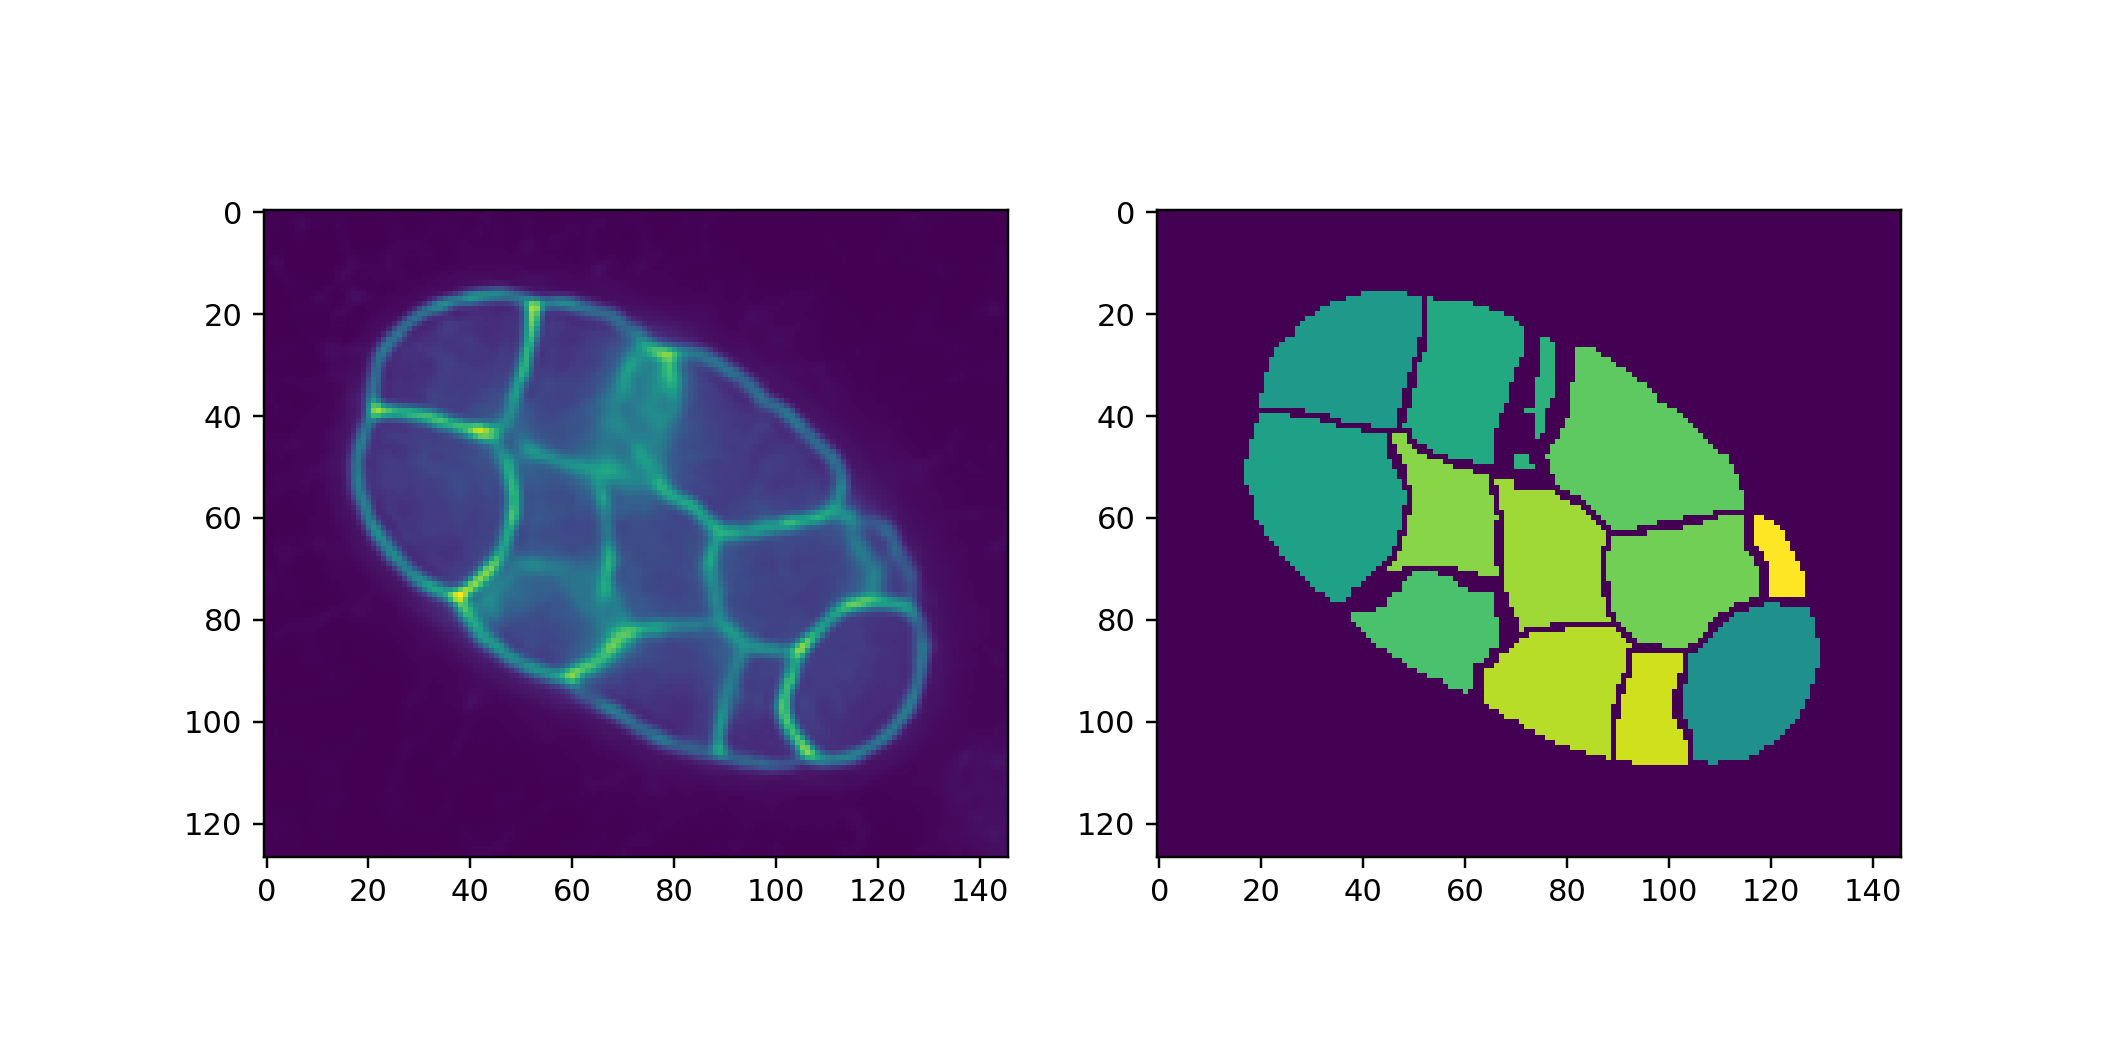

Checkbox(value=True, description='Synchronize images')

Output()

Output()

In [10]:
# test 4D画像の可視化ツール
from tifffile import imread
filename = './Sample/image.tif'
img = imread(filename)
filename = './Sample/segmentation.tif'
seg = imread(filename)

# viewer4D_double(img, seg) # 4D
# viewer4D_double(img[0,:,:,:],seg[0,:,:,:]) # 3D
viewer4D_double(img[0,15,:,:], seg[0,15,:,:]) # 2D
